In [1]:
# Importing dependency
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data path, creating the model object and the name
data_path = '../../../../../input/Santos_Basin/Lake_PreSal_Santos_Basin_Well/v2/gempy_2.3.1/'
geo_model = gp.create_model('Santos_Outer_High_PreSal_Lake_v2')

No module named 'osgeo'


In [2]:
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(
    geo_model,
    extent=[0, 4000, 0, 12000, -2000, 300],
    resolution=[120, 120, 100],
    path_i=data_path + "surfaces_points_workflow_Lake_Presal_V2.csv",
    path_o=data_path + "orientations_points_workflow_Lake_Presal_V2.csv")

Active grids: ['regular']


Santos_Outer_High_PreSal_Lake_v2  2024-01-16 21:48

In [3]:
# The surfaces of the model
gp.get_data(geo_model, 'surfaces')

,surface,series,order_surfaces,color,id
0,ARIRI,Default series,1,#015482,1
1,UBV,Default series,2,#9f0052,2
2,LBV,Default series,3,#ffbe00,3
3,ITAPEMA,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [4]:
# To delete any surface points in the basement.
'''Sometimes this code is necessary, specially if you are interpolating bottoms'''
geo_model.delete_surface_points_basement()

True

In [5]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_1_Series": ('ARIRI', 'UBV'),
                          "Strat_2_Series": ('LBV', 'ITAPEMA'),
                          "Basement_series": ('basement')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[   16.66666667,    50.        , -1988.5       ],
       [   16.66666667,    50.        , -1965.5       ],
       [   16.66666667,    50.        , -1942.5       ],
       ...,
       [ 3983.33333333, 11950.        ,   242.5       ],
       [ 3983.33333333, 11950.        ,   265.5       ],
       [ 3983.33333333, 11950.        ,   288.5       ]])

In [6]:
# Checking the surfaces after the sorting and the series defined
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,ARIRI,Strat_1_Series,1,#015482,1
1,UBV,Strat_1_Series,2,#9f0052,2
2,LBV,Strat_2_Series,1,#ffbe00,3
3,ITAPEMA,Strat_2_Series,2,#728f02,4
4,basement,Basement_series,1,#443988,5


In [7]:
# Set a default orientation if the df is empty (OBS: Gempy need an orientation per series, even if its an arbitrary orientation)
geo_model.set_default_orientation()

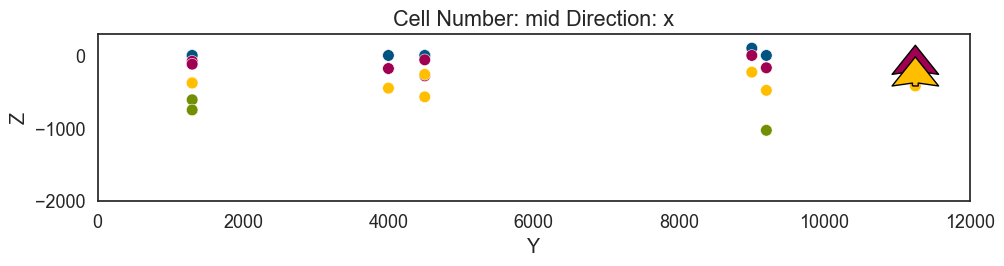

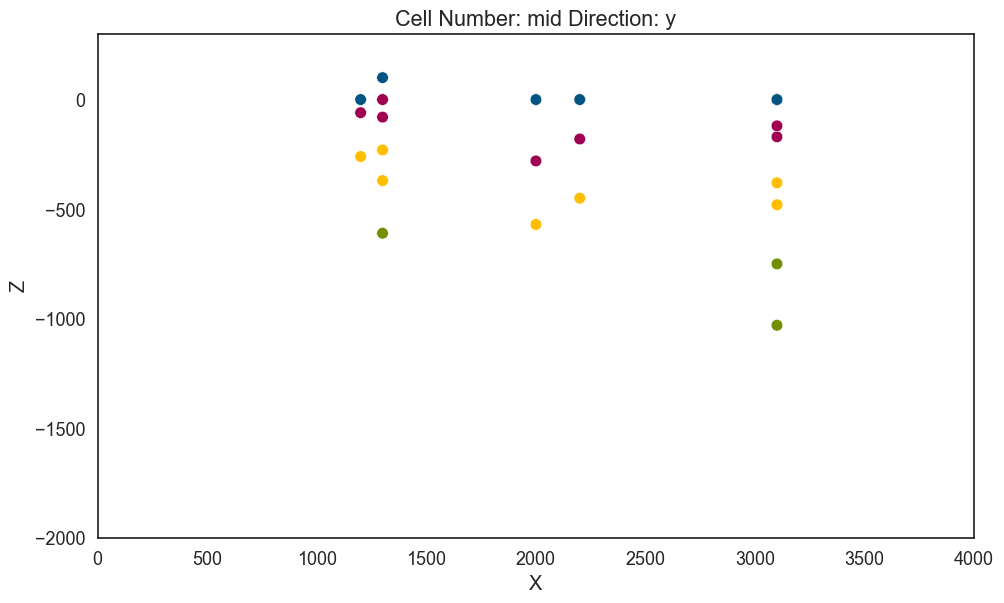

In [8]:
# Plot 2D of the data in X, Y and Z direction
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [9]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

In [10]:
"""# Add random topography
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()"""

'''
OBS: Each time you run this code, a new topography will be generated randomly
If you liked a topography that was generated, you can use the following codes

# To save the topography
geo_model._grid.topography.save('random_topo')
# To load the topography
geo_model.set_topography(source='saved', filepath='random_topo.npy')

If you have a TIF file, you can import using the following code
geo_model.set_topography(source='gdal', filepath=your_path)
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_lith=False,
           show_boundaries=False,
           kwargs_topography={'cmap': 'gray', 'norm': None}
           )
plt.show()
'''

"\nOBS: Each time you run this code, a new topography will be generated randomly\nIf you liked a topography that was generated, you can use the following codes\n\n# To save the topography\ngeo_model._grid.topography.save('random_topo')\n# To load the topography\ngeo_model.set_topography(source='saved', filepath='random_topo.npy')\n\nIf you have a TIF file, you can import using the following code\ngeo_model.set_topography(source='gdal', filepath=your_path)\ngp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_lith=False,\n           show_boundaries=False,\n           kwargs_topography={'cmap': 'gray', 'norm': None}\n           )\nplt.show()\n"

In [10]:
%%time
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                          values
range              12856.515858
$C_o$            3935476.190476
drift equations       [3, 3, 3]
CPU times: total: 10.4 s
Wall time: 32.2 s


In [11]:
%%time
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

CPU times: total: 28.2 s
Wall time: 14.3 s


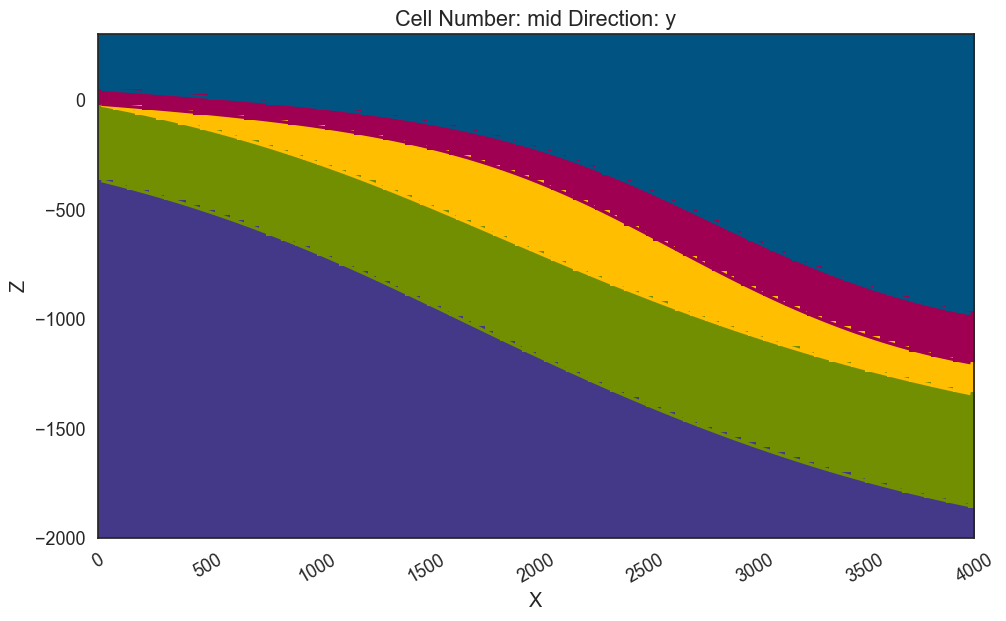

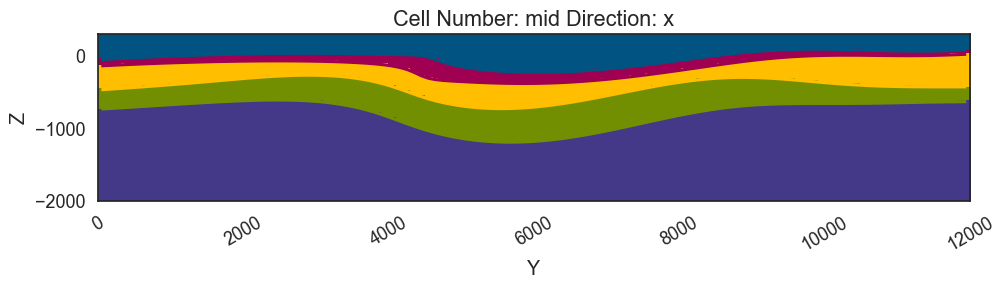

In [12]:
# Plot 2D of Y and X
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)

In [14]:
# Plot 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='background', show_data=True, show_results=True, show_lith=True, show_boundaries=True)

In [15]:
# Saving the model in a .zip file
'''
This code saves the model in a .zip file in 
the same folder that the .ipynb file is located
'''

#gp.save_model(geo_model, compress=True)

'\nThis code saves the model in a .zip file in \nthe same folder that the .ipynb file is located\n'